In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import contextily as ctx
import seaborn as sns
from geopy.distance import geodesic

In [2]:
df = gpd.read_file('Road Weather Information Stations_20250226.geojson')
df


,datetime,airtemperature,roadsurfacetemperature,stationname,recordid,geometry
0,2025-02-25 20:57:00,45.85,49.26,AuroraBridge,6386830,POINT (-122.34728 47.64317)
1,2025-02-25 22:38:00,45.08,45.61,HarborAveUpperNorthBridge,4690534,POINT (-122.37087 47.5717)
2,2025-02-25 22:39:00,45.08,45.58,HarborAveUpperNorthBridge,4690535,POINT (-122.37087 47.5717)
3,2025-02-25 22:40:00,45.03,45.57,HarborAveUpperNorthBridge,4690536,POINT (-122.37087 47.5717)
4,2025-02-25 22:41:00,44.98,45.54,HarborAveUpperNorthBridge,4690537,POINT (-122.37087 47.5717)
...,...,...,...,...,...,...
16357,2025-02-25 05:04:00,46.60,45.20,SpokaneSwingBridge,4689480,POINT (-122.35174 47.57139)
16358,2025-02-25 05:05:00,46.65,45.21,SpokaneSwingBridge,4689481,POINT (-122.35174 47.57139)
16359,2025-02-25 05:06:00,46.67,45.21,SpokaneSwingBridge,4689482,POINT (-122.35174 47.57139)
16360,2025-02-25 05:07:00,46.62,45.21,SpokaneSwingBridge,4689483,POINT (-122.35174 47.57139)


In [3]:
df.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

<Axes: >

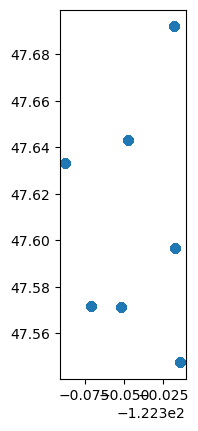

In [4]:
df.plot()

In [5]:
df = df.to_crs(epsg=3857)

/tmp/ipykernel_102/3516457478.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


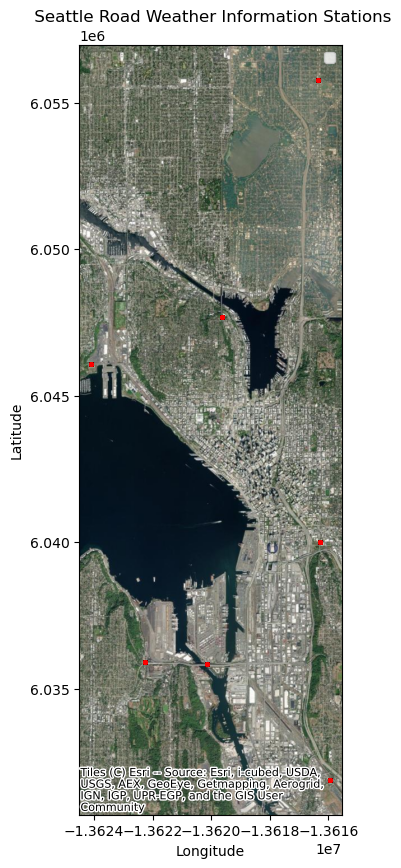

In [6]:

fig, ax = plt.subplots(figsize=(12, 10))
df.plot(ax=ax, markersize=5, color="red", alpha=0.6)
ctx.add_basemap(ax, source=ctx.providers.Esri.WorldImagery)

plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title(" Seattle Road Weather Information Stations")
plt.legend()

plt.show()


In [7]:

df['airtemperature'] = pd.to_numeric(df['airtemperature'], errors='coerce')
df['roadsurfacetemperature'] = pd.to_numeric(df['roadsurfacetemperature'], errors='coerce')

correlation = df['airtemperature'].corr(df['roadsurfacetemperature'])
print(f'Correlation: {correlation:.4f}')


Correlation: 0.8652


In [8]:

df = gpd.read_file("Road Weather Information Stations_20250226.geojson")

df['airtemperature'] = pd.to_numeric(df['airtemperature'], errors='coerce')
df['roadsurfacetemperature'] = pd.to_numeric(df['roadsurfacetemperature'], errors='coerce')



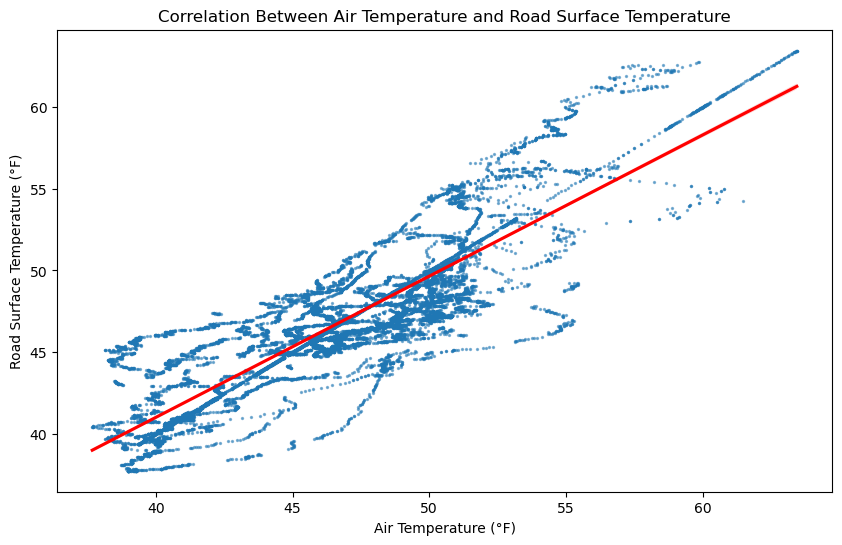

In [9]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x=df['airtemperature'], 
    y=df['roadsurfacetemperature'], 
    scatter_kws={'alpha': 0.5, 's': 2},  
    line_kws={"color": "red"}
)

plt.xlabel("Air Temperature (°F)")
plt.ylabel("Road Surface Temperature (°F)")
plt.title("Correlation Between Air Temperature and Road Surface Temperature")


plt.show()


In [10]:

# Load the dataset
df = gpd.read_file("Road Weather Information Stations_20250226.geojson")

# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

# Extract useful time components
df['hour'] = df['datetime'].dt.hour
df['date'] = df['datetime'].dt.date

# Ensure temperature columns are numeric
df['airtemperature'] = pd.to_numeric(df['airtemperature'], errors='coerce')
df['roadsurfacetemperature'] = pd.to_numeric(df['roadsurfacetemperature'], errors='coerce')

# Drop rows with NaN values in temperature columns
df = df.dropna(subset=['airtemperature', 'roadsurfacetemperature'])

# (Optional) If neighborhoods are available in a separate shapefile, join them
# neighborhoods = gpd.read_file("Seattle_Neighborhoods.geojson")
# df = gpd.sjoin(df, neighborhoods, how="left", predicate="intersects")

# Group by neighborhood and time to get average temperatures
weather_trends = df.groupby(['stationname', 'hour'])[['airtemperature', 'roadsurfacetemperature']].mean().reset_index()





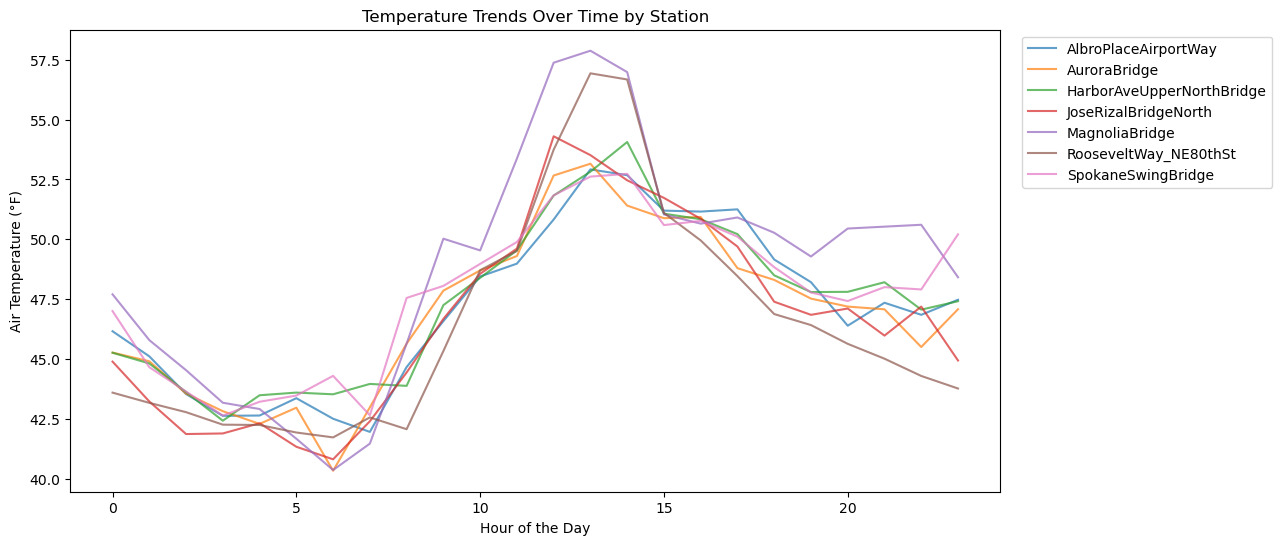

In [11]:
# --- PLOT 1: Temperature Variation Over Time (by Hour) ---
plt.figure(figsize=(12, 6))
sns.lineplot(data=weather_trends, x='hour', y='airtemperature', hue='stationname', alpha=0.7)
plt.xlabel("Hour of the Day")
plt.ylabel("Air Temperature (°F)")
plt.title("Temperature Trends Over Time by Station")
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()

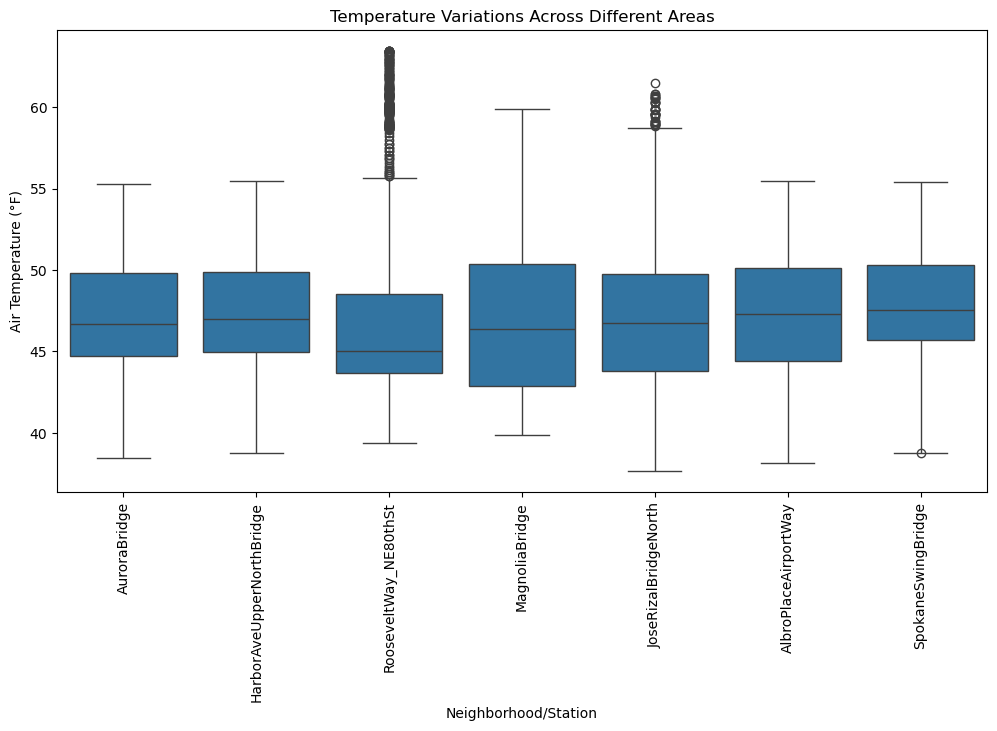

In [12]:
# --- PLOT 2: Compare Temperature Variations by Area ---
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='stationname', y='airtemperature')
plt.xticks(rotation=90)
plt.xlabel("Neighborhood/Station")
plt.ylabel("Air Temperature (°F)")
plt.title("Temperature Variations Across Different Areas")
plt.show()

In [2]:
bs = gpd.read_file('bikeshare_2025-02-28_15-44-09.geojson')

In [3]:
bs

,bike_id,lat,lon,is_reserved,is_disabled,current_range_meters,vehicle_type_id,last_reported,vehicle_type,datetime,geometry
0,3c2655bc-2c68-4775-a3e1-44f4d3f7c35a,47.511363,-122.248320,False,False,4446,2,1740410972,scooter,2025-02-24 07:30:34,POINT (556599.243 5262266.361)
1,24c92835-7d32-42ab-acef-f3e944659bc6,47.520166,-122.261900,False,False,31826,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555567.42 5263234.884)
2,ee8200ca-7feb-4bbc-8634-e9e6ef2bc5f9,47.520079,-122.262540,False,False,5032,2,1740410972,scooter,2025-02-24 07:30:34,POINT (555519.33 5263224.758)
3,12025230-e828-49b1-8eaa-fa4886650db3,47.519871,-122.265957,False,False,27808,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555262.302 5263199.205)
4,16c9c226-d4b0-45fc-95c6-410a37226975,47.543421,-122.267086,False,False,25879,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555152.609 5265815.654)
...,...,...,...,...,...,...,...,...,...,...,...
2535898,c461468c-1f03-4086-b01f-e536a8ae73a7,47.578773,-122.412144,False,False,27321,3,1740531577,e-bike,2025-02-25 17:00:02,POINT (544207.117 5269651.734)
2535899,484c8a65-8c0a-4bc5-88c5-d4fd36007e34,47.578468,-122.413136,False,False,2767,3,1740531577,e-bike,2025-02-25 17:00:02,POINT (544132.775 5269617.273)
2535900,1738dd13-6ad6-4539-8513-75045965241b,47.578456,-122.413138,False,False,27808,3,1740531577,e-bike,2025-02-25 17:00:02,POINT (544132.635 5269615.938)
2535901,d4196954-129f-4c12-95a6-a061af1d46d2,47.575190,-122.419117,False,False,4158,2,1740531577,scooter,2025-02-25 17:00:02,POINT (543685.726 5269249.582)


In [4]:
bs.crs

<Projected CRS: EPSG:32610>
Name: WGS 84 / UTM zone 10N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 126°W and 120°W, northern hemisphere between equator and 84°N, onshore and offshore. Canada - British Columbia (BC); Northwest Territories (NWT); Nunavut; Yukon. United States (USA) - Alaska (AK).
- bounds: (-126.0, 0.0, -120.0, 84.0)
Coordinate Operation:
- name: UTM zone 10N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
bs.head()


,bike_id,lat,lon,is_reserved,is_disabled,current_range_meters,vehicle_type_id,last_reported,vehicle_type,datetime,geometry
0,3c2655bc-2c68-4775-a3e1-44f4d3f7c35a,47.511363,-122.248320,False,False,4446,2,1740410972,scooter,2025-02-24 07:30:34,POINT (556599.243 5262266.361)
1,24c92835-7d32-42ab-acef-f3e944659bc6,47.520166,-122.261900,False,False,31826,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555567.42 5263234.884)
2,ee8200ca-7feb-4bbc-8634-e9e6ef2bc5f9,47.520079,-122.262540,False,False,5032,2,1740410972,scooter,2025-02-24 07:30:34,POINT (555519.33 5263224.758)
3,12025230-e828-49b1-8eaa-fa4886650db3,47.519871,-122.265957,False,False,27808,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555262.302 5263199.205)
4,16c9c226-d4b0-45fc-95c6-410a37226975,47.543421,-122.267086,False,False,25879,3,1740410972,e-bike,2025-02-24 07:30:34,POINT (555152.609 5265815.654)


In [6]:


# Display basic information
print(bs.info())  # Shows column names, data types, and non-null values
print(bs.head())  # Show first few rows

# Check Coordinate Reference System (CRS)
print("\nCRS:", bs.crs)

# Check datetime column format
print("\nDatetime Column Type:", bs['datetime'].dtype)


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2535903 entries, 0 to 2535902
Data columns (total 11 columns):
 #   Column                Dtype         
---  ------                -----         
 0   bike_id               object        
 1   lat                   float64       
 2   lon                   float64       
 3   is_reserved           bool          
 4   is_disabled           bool          
 5   current_range_meters  int32         
 6   vehicle_type_id       int32         
 7   last_reported         int32         
 8   vehicle_type          object        
 9   datetime              datetime64[ms]
 10  geometry              geometry      
dtypes: bool(2), datetime64[ms](1), float64(2), geometry(1), int32(3), object(2)
memory usage: 149.9+ MB
None
                                bike_id        lat         lon  is_reserved  \
0  3c2655bc-2c68-4775-a3e1-44f4d3f7c35a  47.511363 -122.248320        False   
1  24c92835-7d32-42ab-acef-f3e944659bc6  47.520166 -122.261900   

In [7]:
bs_filtered['datetime'] = pd.to_datetime(bs_filtered['datetime'])


NameError: name 'bs_filtered' is not defined

In [8]:
bs_filtered = bs[['bike_id', 'vehicle_type', 'datetime']]
print(bs_filtered.head())  


                                bike_id vehicle_type            datetime
0  3c2655bc-2c68-4775-a3e1-44f4d3f7c35a      scooter 2025-02-24 07:30:34
1  24c92835-7d32-42ab-acef-f3e944659bc6       e-bike 2025-02-24 07:30:34
2  ee8200ca-7feb-4bbc-8634-e9e6ef2bc5f9      scooter 2025-02-24 07:30:34
3  12025230-e828-49b1-8eaa-fa4886650db3       e-bike 2025-02-24 07:30:34
4  16c9c226-d4b0-45fc-95c6-410a37226975       e-bike 2025-02-24 07:30:34


In [9]:
from datetime import datetime

In [10]:
my_date = "2025-02-26"
my_date = datetime.strptime(my_date, "%Y-%m-%d")
my_date, my_date + pd.Timedelta(days=1)

(datetime.datetime(2025, 2, 26, 0, 0), datetime.datetime(2025, 2, 27, 0, 0))

In [11]:
my_date_mask = (bs.datetime > my_date) & (bs.datetime < my_date + pd.Timedelta(days=1)) 

In [16]:
bs[my_date_mask]

,bike_id,lat,lon,is_reserved,is_disabled,current_range_meters,vehicle_type_id,last_reported,vehicle_type,datetime,geometry
48146,4fecd781-c8d6-4daa-b5b9-6085ccc22edd,47.511367,-122.248322,False,False,12356,2,1740618009,scooter,2025-02-26 17:00:00,POINT (556599.088 5262266.804)
48147,269ab8a2-21c7-4679-ade1-15485536fdbe,47.515118,-122.258613,False,False,34979,2,1740618009,scooter,2025-02-26 17:00:00,POINT (555820.233 5262676.228)
48148,13b7112d-874a-4dcb-abb1-c4d971dab5ac,47.670946,-122.261069,False,False,37147,3,1740618009,e-bike,2025-02-26 17:00:00,POINT (555470.392 5279992.739)
48149,05ad0c6b-f4de-45ef-a779-47bfbb4fde88,47.526796,-122.261406,False,False,22630,3,1740618009,e-bike,2025-02-26 17:00:00,POINT (555597.604 5263972.068)
48150,27a72291-5693-4c9a-b35c-0d28330d0b51,47.670354,-122.268801,False,False,20409,2,1740618009,scooter,2025-02-26 17:00:00,POINT (554890.587 5279921.44)
...,...,...,...,...,...,...,...,...,...,...,...
2519881,cdb4664a-246b-4f39-b5cb-1f27edbb5ce0,47.578833,-122.411867,False,False,15418,2,1740591042,scooter,2025-02-26 09:31:01,POINT (544227.897 5269658.56)
2519882,410b3590-669d-4ce7-bd54-da6ea9392666,47.578829,-122.411885,False,False,35516,2,1740591042,scooter,2025-02-26 09:31:01,POINT (544226.547 5269658.105)
2519883,ec4a5861-5b4a-4880-8837-2a836c1b9b13,47.578785,-122.412076,False,False,27808,3,1740591042,e-bike,2025-02-26 09:31:01,POINT (544212.221 5269653.106)
2519884,ddb2f089-806c-4149-a15d-d2cbd8f93b3f,47.575198,-122.419149,False,False,24467,3,1740591042,e-bike,2025-02-26 09:31:01,POINT (543683.312 5269250.453)


In [17]:
def calculate_distance(df):
    df = df.sort_values(by="datetime")  # Ensure time order
    df['prev_lat'] = df['lat'].shift(1)
    df['prev_lon'] = df['lon'].shift(1)
    
    # Calculate distance in meters
    df['distance_m'] = df.apply(
        lambda row: geodesic((row['prev_lat'], row['prev_lon']), (row['lat'], row['lon'])).meters 
        if pd.notnull(row['prev_lat']) else 0, axis=1)
    
    return df

In [17]:
bs[my_date_mask].groupby("bike_id", group_keys=False).apply(calculate_distance)

/tmp/ipykernel_114/2335054580.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bs[my_date_mask].groupby("bike_id", group_keys=False).apply(calculate_distance)


,bike_id,lat,lon,is_reserved,is_disabled,current_range_meters,vehicle_type_id,last_reported,vehicle_type,datetime,geometry,prev_lat,prev_lon,distance_m
48146,4fecd781-c8d6-4daa-b5b9-6085ccc22edd,47.511367,-122.248322,False,False,12356,2,1740618009,scooter,2025-02-26 17:00:00,POINT (556599.088 5262266.804),NaN,NaN,0
48147,269ab8a2-21c7-4679-ade1-15485536fdbe,47.515118,-122.258613,False,False,34979,2,1740618009,scooter,2025-02-26 17:00:00,POINT (555820.233 5262676.228),NaN,NaN,0
48148,13b7112d-874a-4dcb-abb1-c4d971dab5ac,47.670946,-122.261069,False,False,37147,3,1740618009,e-bike,2025-02-26 17:00:00,POINT (555470.392 5279992.739),NaN,NaN,0
48149,05ad0c6b-f4de-45ef-a779-47bfbb4fde88,47.526796,-122.261406,False,False,22630,3,1740618009,e-bike,2025-02-26 17:00:00,POINT (555597.604 5263972.068),NaN,NaN,0
48150,27a72291-5693-4c9a-b35c-0d28330d0b51,47.670354,-122.268801,False,False,20409,2,1740618009,scooter,2025-02-26 17:00:00,POINT (554890.587 5279921.44),NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2519881,cdb4664a-246b-4f39-b5cb-1f27edbb5ce0,47.578833,-122.411867,False,False,15418,2,1740591042,scooter,2025-02-26 09:31:01,POINT (544227.897 5269658.56),NaN,NaN,0
2519882,410b3590-669d-4ce7-bd54-da6ea9392666,47.578829,-122.411885,False,False,35516,2,1740591042,scooter,2025-02-26 09:31:01,POINT (544226.547 5269658.105),NaN,NaN,0
2519883,ec4a5861-5b4a-4880-8837-2a836c1b9b13,47.578785,-122.412076,False,False,27808,3,1740591042,e-bike,2025-02-26 09:31:01,POINT (544212.221 5269653.106),NaN,NaN,0
2519884,ddb2f089-806c-4149-a15d-d2cbd8f93b3f,47.575198,-122.419149,False,False,24467,3,1740591042,e-bike,2025-02-26 09:31:01,POINT (543683.312 5269250.453),NaN,NaN,0


In [18]:
my_date = "2025-02-22"
my_date = datetime.strptime(my_date, "%Y-%m-%d")
my_date, my_date + pd.Timedelta(days=1)

(datetime.datetime(2025, 2, 22, 0, 0), datetime.datetime(2025, 2, 23, 0, 0))

In [19]:
my_date_mask = (bs.datetime > my_date) & (bs.datetime < my_date + pd.Timedelta(days=1)) 

In [20]:
bs[my_date_mask]

,bike_id,lat,lon,is_reserved,is_disabled,current_range_meters,vehicle_type_id,last_reported,vehicle_type,datetime,geometry
72111,348a28fe-951e-4339-8b05-6ab85f75dd3e,47.520074,-122.262508,False,False,4446,3,1740234626,e-bike,2025-02-22 06:30:52,POINT (555521.744 5263224.225)
72112,363142c1-79c3-47a7-bd36-82491ca90de3,47.523507,-122.263511,False,False,21732,2,1740234626,scooter,2025-02-22 06:30:52,POINT (555442.617 5263605.038)
72113,6eed629e-a321-48f4-a020-4d2da084a342,47.538952,-122.264554,False,False,31826,2,1740234626,scooter,2025-02-22 06:30:52,POINT (555347.847 5265320.788)
72114,fc860a02-cb1a-4952-be1d-510d64fa0084,47.538826,-122.264676,False,False,38251,2,1740234626,scooter,2025-02-22 06:30:52,POINT (555338.799 5265306.698)
72115,b47f9849-4eae-4717-bb4a-905ee1b5eac9,47.525007,-122.264746,False,False,34979,2,1740234626,scooter,2025-02-22 06:30:52,POINT (555348.069 5263770.861)
...,...,...,...,...,...,...,...,...,...,...,...
2487857,f540011a-bf57-41f3-be77-4bdbde884e8c,47.565801,-122.407978,False,False,3873,3,1740268790,e-bike,2025-02-22 16:00:06,POINT (544531.398 5268212.446)
2487858,0d867df3-8524-4074-ac3f-f86c80831432,47.568155,-122.409585,False,False,28793,3,1740268790,e-bike,2025-02-22 16:00:06,POINT (544408.531 5268473.142)
2487859,1a2dd319-2ec5-4010-b69b-3f0f70534b35,47.578812,-122.411842,False,False,31826,3,1740268790,e-bike,2025-02-22 16:00:06,POINT (544229.795 5269656.24)
2487860,061c634c-2b4d-468d-88ea-344050f621e7,47.654137,-122.412969,False,False,16621,2,1740268790,scooter,2025-02-22 16:00:06,POINT (544081.688 5278027.058)


In [21]:
def calculate_distance(df):
    df = df.sort_values(by="datetime")  # Ensure time order
    df['prev_lat'] = df['lat'].shift(1)
    df['prev_lon'] = df['lon'].shift(1)
    
    # Calculate distance in meters
    df['distance_m'] = df.apply(
        lambda row: geodesic((row['prev_lat'], row['prev_lon']), (row['lat'], row['lon'])).meters 
        if pd.notnull(row['prev_lat']) else 0, axis=1)
    
    return df

In [ ]:
bs[my_date_mask].groupby("bike_id", group_keys=False).apply(calculate_distance)

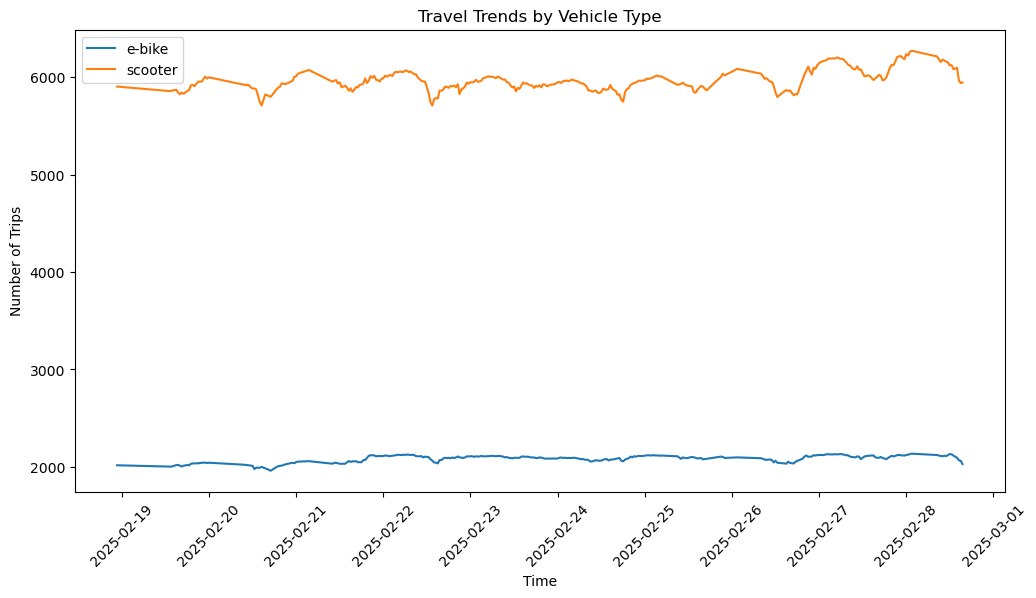

In [10]:


# Convert 'datetime' to datetime format
bs['datetime'] = pd.to_datetime(bs['datetime'])

# Filter only necessary columns
bs_filtered = bs[['bike_id', 'vehicle_type', 'datetime']]

# Group by bike_id and count the number of records (trips) over time
bike_trends = bs_filtered.groupby(['bike_id', 'datetime']).size().reset_index(name='trip_count')

# Separate trends by vehicle_type
vehicle_trends = bs_filtered.groupby(['vehicle_type', 'datetime']).size().reset_index(name='trip_count')

# Plot trends by vehicle type
plt.figure(figsize=(12, 6))
for vehicle_type in vehicle_trends['vehicle_type'].unique():
    type_data = vehicle_trends[vehicle_trends['vehicle_type'] == vehicle_type]
    plt.plot(type_data['datetime'], type_data['trip_count'], label=vehicle_type)

plt.xlabel('Time')
plt.ylabel('Number of Trips')
plt.title('Travel Trends by Vehicle Type')
plt.legend()
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_883/3413330661.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bs_filtered['datetime'] = bs_filtered['datetime'].dt.floor('H')  # Round to nearest hour
/tmp/ipykernel_883/3413330661.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bs_filtered['datetime'] = bs_filtered['datetime'].dt.floor('H')  # Round to nearest hour


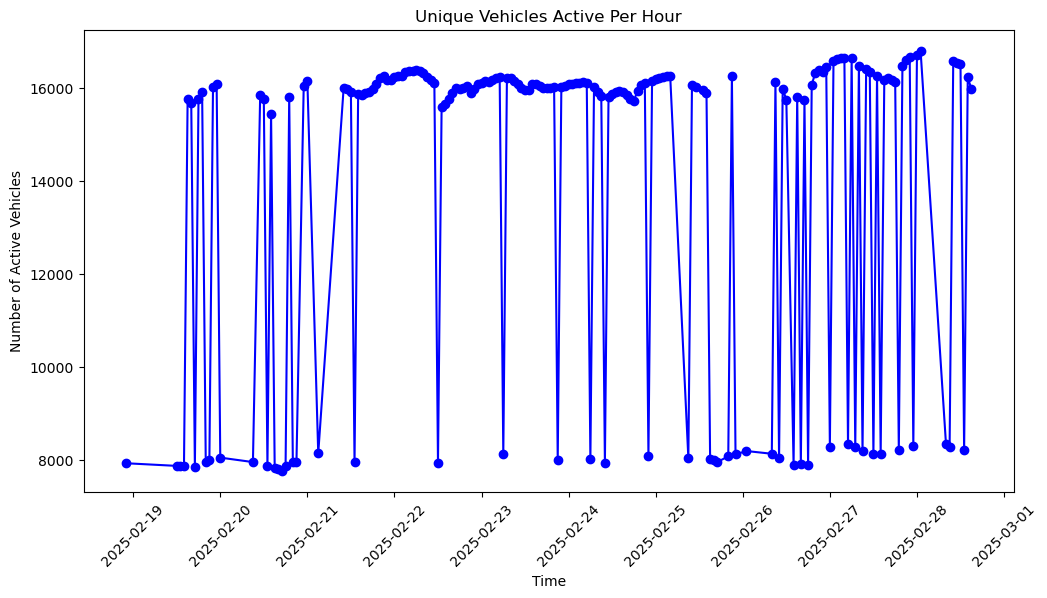

In [11]:


# Convert 'datetime' to datetime format
bs['datetime'] = pd.to_datetime(bs['datetime'])

# Filter relevant columns
bs_filtered = bs[['bike_id', 'vehicle_type', 'datetime']]

# Aggregate by hourly intervals
bs_filtered['datetime'] = bs_filtered['datetime'].dt.floor('H')  # Round to nearest hour
time_series = bs_filtered.groupby('datetime').bike_id.nunique().reset_index(name='unique_vehicles')

# Plot unique vehicles over time
plt.figure(figsize=(12, 6))
plt.plot(time_series['datetime'], time_series['unique_vehicles'], color='blue', marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Number of Active Vehicles')
plt.title('Unique Vehicles Active Per Hour')
plt.xticks(rotation=45)
plt.show()


/tmp/ipykernel_883/2749508370.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bs['datetime_hourly'] = bs['datetime'].dt.floor('H')


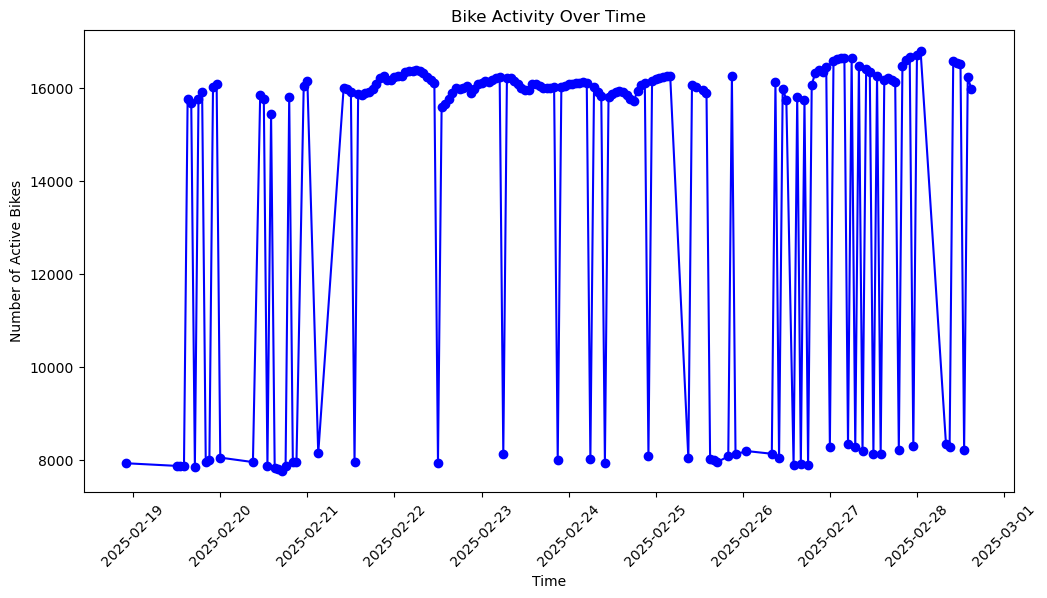

In [12]:


# Convert datetime to proper format
bs['datetime'] = pd.to_datetime(bs['datetime'])

# Sort by bike_id and datetime for correct tracking
bs = bs.sort_values(by=['bike_id', 'datetime'])

# Compute the number of active bikes per hour
bs['datetime_hourly'] = bs['datetime'].dt.floor('H')
hourly_trends = bs.groupby('datetime_hourly').bike_id.nunique().reset_index(name='active_bikes')

# Plot overall bike activity trend
plt.figure(figsize=(12, 6))
plt.plot(hourly_trends['datetime_hourly'], hourly_trends['active_bikes'], color='blue', marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Number of Active Bikes')
plt.title('Bike Activity Over Time')
plt.xticks(rotation=45)
plt.show()



/tmp/ipykernel_883/1579483477.py:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  bs['datetime_hourly'] = bs['datetime'].dt.floor('H')


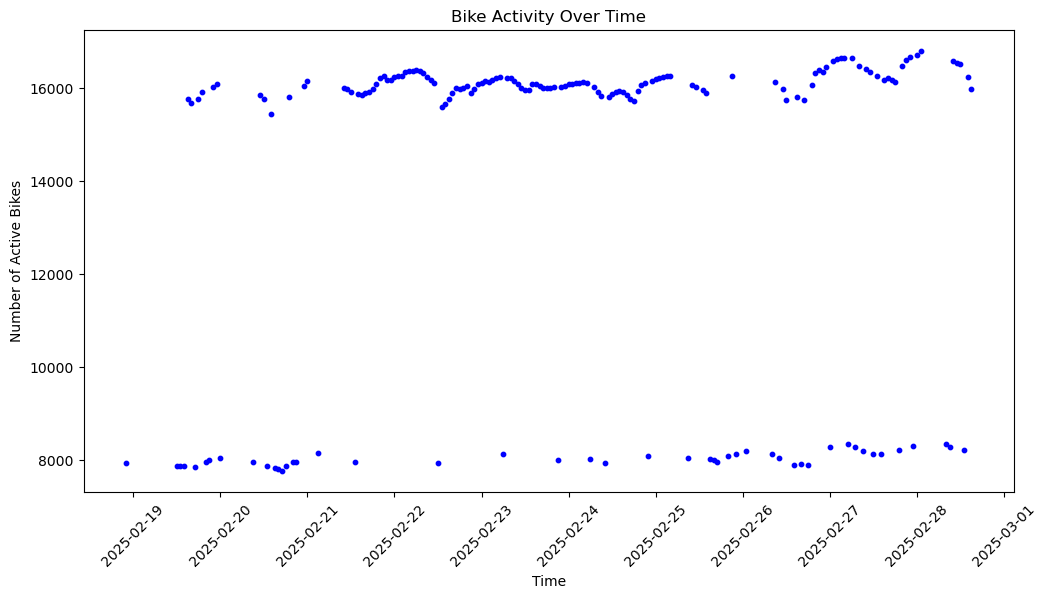

In [13]:
# Convert datetime to proper format
bs['datetime'] = pd.to_datetime(bs['datetime'])

# Sort by bike_id and datetime for correct tracking
bs = bs.sort_values(by=['bike_id', 'datetime'])

# Compute the number of active bikes per hour
bs['datetime_hourly'] = bs['datetime'].dt.floor('H')
hourly_trends = bs.groupby('datetime_hourly').bike_id.nunique().reset_index(name='active_bikes')

# Plot overall bike activity trend
plt.figure(figsize=(12, 6))
plt.scatter(hourly_trends['datetime_hourly'], hourly_trends['active_bikes'], color='blue', marker='o', s=10)
plt.xlabel('Time')
plt.ylabel('Number of Active Bikes')
plt.title('Bike Activity Over Time')
plt.xticks(rotation=45)
plt.show()

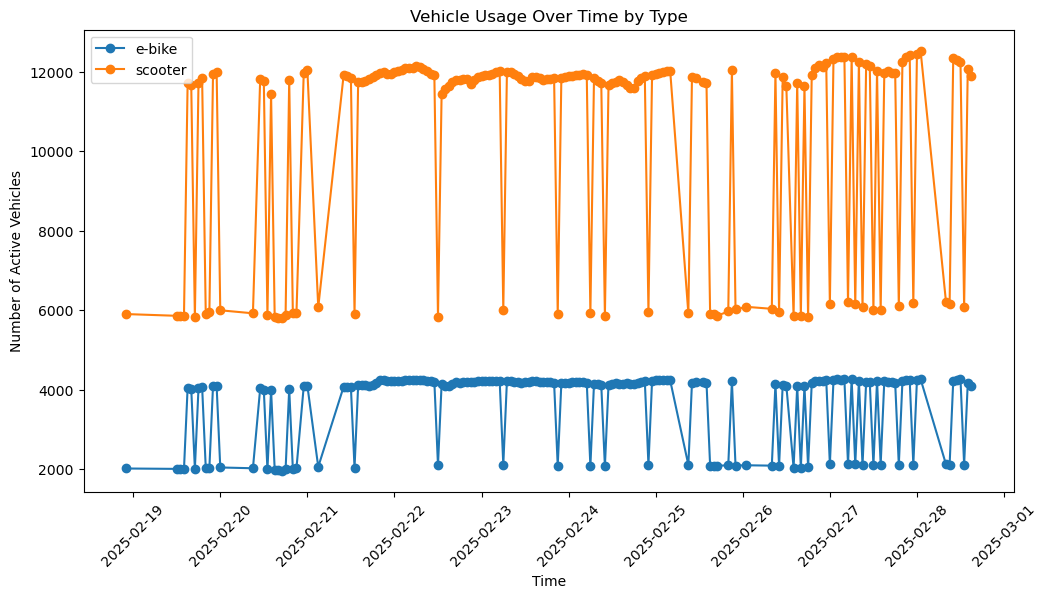

In [17]:

# ---------------------------------------------
# 🔄 **Vehicle Type Analysis Over Time**
# ---------------------------------------------

# Aggregate vehicle usage over time
vehicle_trends = bs.groupby(['vehicle_type', 'datetime_hourly']).bike_id.nunique().reset_index(name='count')

# Plot trends by vehicle type
plt.figure(figsize=(12, 6))
for vehicle_type in vehicle_trends['vehicle_type'].unique():
    type_data = vehicle_trends[vehicle_trends['vehicle_type'] == vehicle_type]
    plt.plot(type_data['datetime_hourly'], type_data['count'], label=vehicle_type, marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Number of Active Vehicles')
plt.title('Vehicle Usage Over Time by Type')
plt.legend()
plt.xticks(rotation=45)
plt.show()

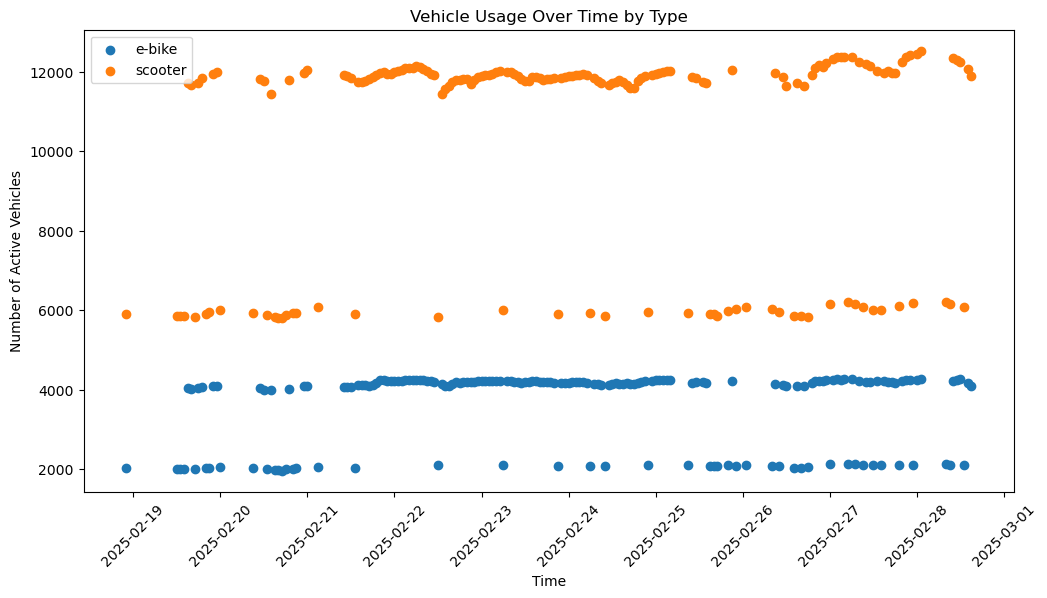

In [15]:
# Aggregate vehicle usage over time
vehicle_trends = bs.groupby(['vehicle_type', 'datetime_hourly']).bike_id.nunique().reset_index(name='count')

# Plot trends by vehicle type
plt.figure(figsize=(12, 6))
for vehicle_type in vehicle_trends['vehicle_type'].unique():
    type_data = vehicle_trends[vehicle_trends['vehicle_type'] == vehicle_type]
    plt.scatter(type_data['datetime_hourly'], type_data['count'], label=vehicle_type, marker='o', linestyle='-')

plt.xlabel('Time')
plt.ylabel('Number of Active Vehicles')
plt.title('Vehicle Usage Over Time by Type')
plt.legend()
plt.xticks(rotation=45)
plt.show()

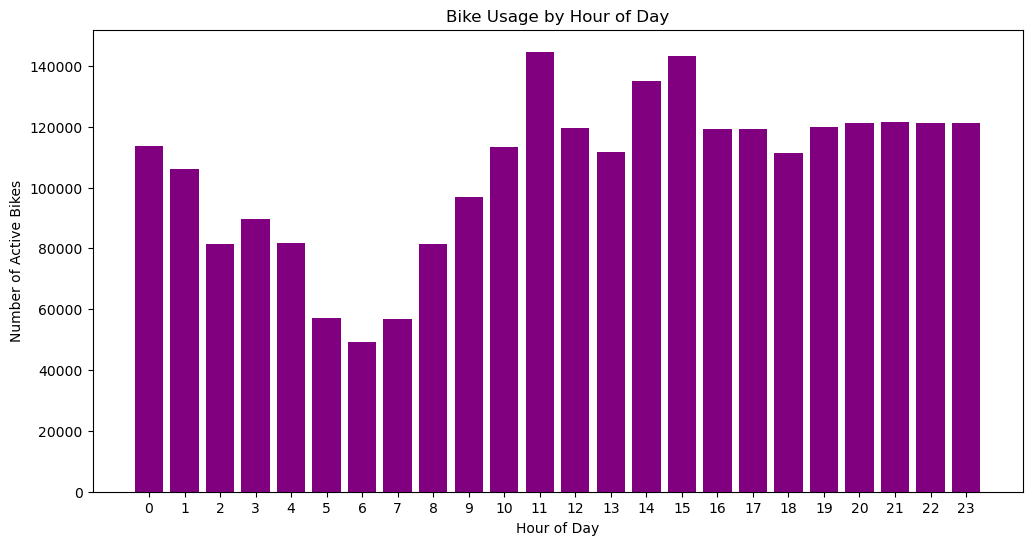

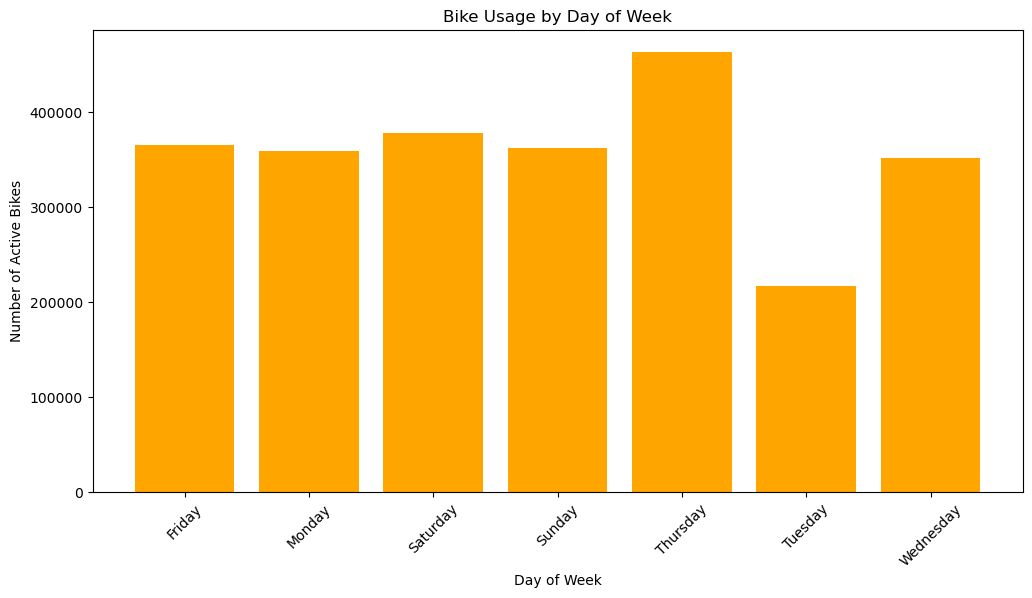

In [17]:

# ---------------------------------------------
# 🕰️ **Peak Usage Hours & Days**
# ---------------------------------------------

# Extract hour and weekday for trend analysis
bs['hour'] = bs['datetime'].dt.hour
bs['day_of_week'] = bs['datetime'].dt.day_name()

# Aggregate bike activity per hour
hourly_counts = bs.groupby('hour').bike_id.nunique().reset_index(name='active_bikes')

# Aggregate bike activity per day of the week
daily_counts = bs.groupby('day_of_week').bike_id.nunique().reset_index(name='active_bikes')

# Plot hourly trend
plt.figure(figsize=(12, 6))
plt.bar(hourly_counts['hour'], hourly_counts['active_bikes'], color='purple')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Active Bikes')
plt.title('Bike Usage by Hour of Day')
plt.xticks(range(0, 24))
plt.show()

# Plot daily trend
plt.figure(figsize=(12, 6))
plt.bar(daily_counts['day_of_week'], daily_counts['active_bikes'], color='orange')
plt.xlabel('Day of Week')
plt.ylabel('Number of Active Bikes')
plt.title('Bike Usage by Day of Week')
plt.xticks(rotation=45)
plt.show()